In [5]:
import matplotlib.pyplot as plt
import numpy as np
import json
from time import time
from pathlib import Path

In [2]:
#DEFININDO ALGUNS PARÂMETROS DO GRÁFICO
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
params = {
    'figure.figsize': [12, 3.3],
    'axes.labelsize': 12,
    'axes.titlesize':14,
    'font.size': 12,
    'legend.fontsize': 10,
    'xtick.labelsize': 10,
    'ytick.labelsize': 10,
    'axes.axisbelow': True
}
plt.rcParams.update(params)

In [3]:
def printarResultado(matrizProbabilidadeDeteccao, matrizConfusao, rangePotEspiao, rangeSNRs, qtdUsuarios, qtdAntenas, qtdSimbolos, descricao, acuracia, precisao, revocacao, tempoMedio, tempoDesvio):
    
    # MONTANDO O TITULO DA FIGURA
    titulo  = descricao + "\n"
    titulo += "Usuários: " + str(qtdUsuarios) + " - Antenas: " + str(qtdAntenas) + " - Símbolos: " + str(qtdSimbolos) + "\n"
    titulo += "Acurácia: " + str(acuracia)[:7] + " - Precisão: " + str(precisao)[:7] + " - Revocação: " + str(revocacao)[:7] + "\n"
    titulo += "Tempo (ms): " + str(tempoMedio*1000)[:7] + " +- " + str(tempoDesvio*1000)[:7]
    
    # CRIANDO O PRIMEIRO GRAFICO
    fig, axs = plt.subplots(1, 2)
    for i in range(len(rangePotEspiao)):
        axs[0].plot(rangeSNRs, matrizProbabilidadeDeteccao[i], label="Potência do Espião: "+str(rangePotEspiao[i]))
    axs[0].set_xlabel("SNR")
    axs[0].set_ylabel("Probabilidade de Detecção")
    axs[0].grid(alpha=0.5)
    axs[0].legend()
    
    # CRIANDO A MATRIZ DE CONFUSAO
    axs[1].imshow(matrizConfusao, cmap="gray")
    for (j,i), total in np.ndenumerate(matrizConfusao):
        axs[1].text(i, j, int(total), ha="center", va="center", color="#e6005c", size=15)
    axs[1].set_xlabel("Predito")
    axs[1].set_ylabel("Real")
    axs[1].set_xticklabels([])
    axs[1].set_yticklabels([])
    
    # PRINTANDO
    plt.suptitle(titulo, y=1.15)
    fig_name = "name" + ".pdf"
    plt.savefig(fig_name, bbox_inches="tight")
    plt.show()

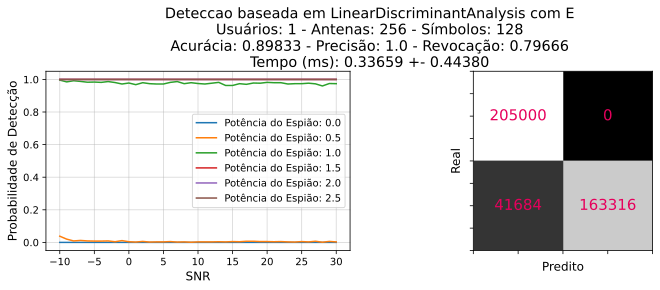

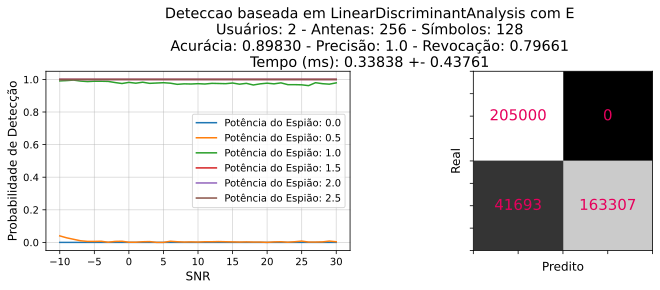

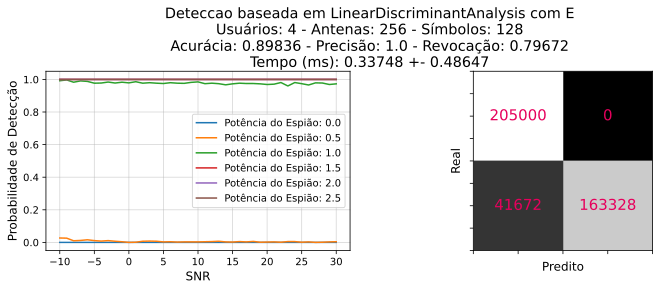

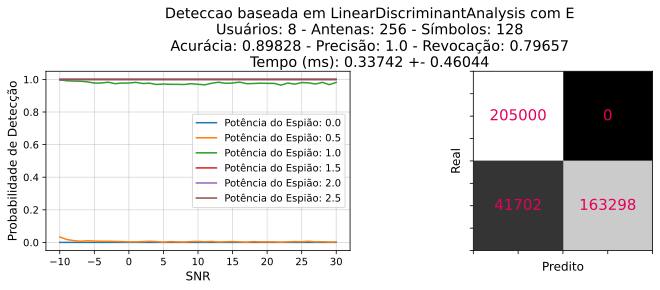

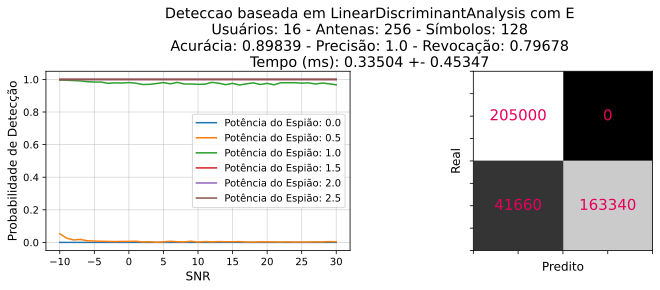

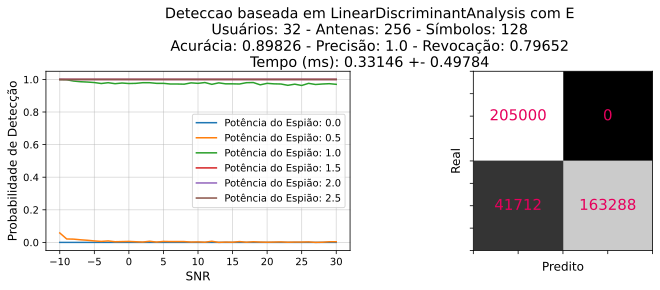

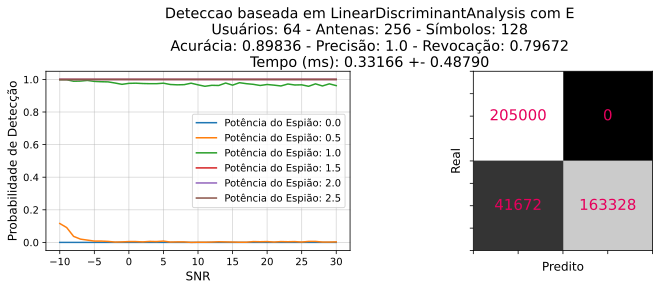

In [10]:
tecnicaDeteccao      = "linear" # svc, perceptron, linear, tree
featuresSelecionadas = ["E"] # Se usar "hassan", features tem que ser ["E", "eta"]

arquivoUltimosResultados = sorted(Path("../../Resultados/").glob("probabilidadeDeteccao_*.json"))[-1]
dictResultados = json.load(open(arquivoUltimosResultados))

for key, values in dictResultados.items():
    if tecnicaDeteccao.upper() in key.upper() and featuresSelecionadas == values["featuresSelecionadas"]:
        
        matrizProbabilidadeDeteccao = values["matrizProbabilidadeDeteccao"]
        matrizConfusao              = values["matrizConfusao"]
        rangePotEspiao              = values["rangePotEspiao"] 
        rangeSNRs                   = values["rangeSNRs"]
        qtdUsuarios                 = values["qtdUsuarios"]
        qtdAntenas                  = values["qtdAntenas"] 
        qtdSimbolos                 = values["qtdSimbolos"] 
        descricao                   = values["descricao"]
        acuracia                    = values["acuracia"]
        precisao                    = values["precisao"] 
        revocacao                   = values["revocacao"]
        tempoMedio                  = values["tempoMedioPredicao"]
        tempoDesvio                 = values["tempoDesvioPredicao"]
        
        printarResultado(matrizProbabilidadeDeteccao, matrizConfusao, rangePotEspiao, rangeSNRs, qtdUsuarios, qtdAntenas, qtdSimbolos, descricao, acuracia, precisao, revocacao, tempoMedio, tempoDesvio)